Load dataset

In [1]:
import pandas as pd
    
df = pd.read_csv("ev_charging_patterns.csv")
df.head()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler


Eksplorasi data

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User ID                                   1320 non-null   object 
 1   Vehicle Model                             1320 non-null   object 
 2   Battery Capacity (kWh)                    1320 non-null   float64
 3   Charging Station ID                       1320 non-null   object 
 4   Charging Station Location                 1320 non-null   object 
 5   Charging Start Time                       1320 non-null   object 
 6   Charging End Time                         1320 non-null   object 
 7   Energy Consumed (kWh)                     1254 non-null   float64
 8   Charging Duration (hours)                 1320 non-null   float64
 9   Charging Rate (kW)                        1254 non-null   float64
 10  Charging Cost (USD)                 

Mengubah tipe data pada kolom 'Charging start time' & 'Charging end time'

In [3]:
df['Charging Start Time'] = pd.to_datetime(df['Charging Start Time'])
df['Charging End Time'] = pd.to_datetime(df['Charging End Time'])

Membuat kolom baru 'Day Name'

In [4]:
df['Day Name'] = df['Charging Start Time'].dt.day_name()

Menghapus kolom 'Day of Week'

In [5]:
df = df.drop(columns=['Day of Week'])

Menghapus kolom yang tidak diperlukan

In [6]:
df.drop(columns=["User ID", "Charging Station ID"], inplace=True, errors='ignore')

Cek kolom pada dataset

In [7]:
df.columns

Index(['Vehicle Model', 'Battery Capacity (kWh)', 'Charging Station Location',
       'Charging Start Time', 'Charging End Time', 'Energy Consumed (kWh)',
       'Charging Duration (hours)', 'Charging Rate (kW)',
       'Charging Cost (USD)', 'Time of Day', 'State of Charge (Start %)',
       'State of Charge (End %)', 'Distance Driven (since last charge) (km)',
       'Temperature (°C)', 'Vehicle Age (years)', 'Charger Type', 'User Type',
       'Day Name'],
      dtype='object')

Cek kolom pada dataset

In [8]:
df.isnull().sum()

Vehicle Model                                0
Battery Capacity (kWh)                       0
Charging Station Location                    0
Charging Start Time                          0
Charging End Time                            0
Energy Consumed (kWh)                       66
Charging Duration (hours)                    0
Charging Rate (kW)                          66
Charging Cost (USD)                          0
Time of Day                                  0
State of Charge (Start %)                    0
State of Charge (End %)                      0
Distance Driven (since last charge) (km)    66
Temperature (°C)                             0
Vehicle Age (years)                          0
Charger Type                                 0
User Type                                    0
Day Name                                     0
dtype: int64

Menangani missing value kolom 'Energy Consumed (KkWh)' dengan 'Charging Duration' * 'Charging Rate (kW)'

In [9]:
mask = df['Energy Consumed (kWh)'].isnull() & (df['Charging Duration (hours)'] != 0)
df.loc[mask, 'Energy Consumed (kWh)'] = df.loc[mask, 'Charging Rate (kW)'] * df.loc[mask, 'Charging Duration (hours)']

Menangani missing value kolom 'Charging Rate (kW)' dengan 'Energy Consumed (KkWh)' / 'Charging Duration' 

In [10]:
mask = df['Charging Rate (kW)'].isnull() & (df['Charging Duration (hours)'] != 0)
df.loc[mask, 'Charging Rate (kW)'] = df.loc[mask, 'Energy Consumed (kWh)'] / df.loc[mask, 'Charging Duration (hours)']

Menangani missing value kolom 'Distance Driven (since last charge) (km)' dengan median

In [11]:
df['Distance Driven (since last charge) (km)'] = df['Distance Driven (since last charge) (km)'].fillna(
    df['Distance Driven (since last charge) (km)'].median())

Cek missing value setelah penanganan

In [12]:
df.isnull().sum()

Vehicle Model                               0
Battery Capacity (kWh)                      0
Charging Station Location                   0
Charging Start Time                         0
Charging End Time                           0
Energy Consumed (kWh)                       3
Charging Duration (hours)                   0
Charging Rate (kW)                          3
Charging Cost (USD)                         0
Time of Day                                 0
State of Charge (Start %)                   0
State of Charge (End %)                     0
Distance Driven (since last charge) (km)    0
Temperature (°C)                            0
Vehicle Age (years)                         0
Charger Type                                0
User Type                                   0
Day Name                                    0
dtype: int64

Hapus baris yang masih mengandung missing value

In [13]:
df = df.dropna(subset=['Energy Consumed (kWh)', 'Charging Rate (kW)'])

Cek missing value setelah penanganan

In [14]:
df.isnull().sum()

Vehicle Model                               0
Battery Capacity (kWh)                      0
Charging Station Location                   0
Charging Start Time                         0
Charging End Time                           0
Energy Consumed (kWh)                       0
Charging Duration (hours)                   0
Charging Rate (kW)                          0
Charging Cost (USD)                         0
Time of Day                                 0
State of Charge (Start %)                   0
State of Charge (End %)                     0
Distance Driven (since last charge) (km)    0
Temperature (°C)                            0
Vehicle Age (years)                         0
Charger Type                                0
User Type                                   0
Day Name                                    0
dtype: int64

Cek outlier menggunakan IQR

In [15]:
import pandas as pd

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

def count_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((data[col] < lower_bound) | (data[col] > upper_bound)).sum()

outlier_counts = {col: count_outliers_iqr(df, col) for col in numerical_cols}

print(pd.Series(outlier_counts).sort_values(ascending=False))


Battery Capacity (kWh)                      33
State of Charge (End %)                     19
Energy Consumed (kWh)                       11
Charging Duration (hours)                    6
Charging Rate (kW)                           4
Charging Cost (USD)                          3
Temperature (°C)                             2
State of Charge (Start %)                    1
Distance Driven (since last charge) (km)     0
Vehicle Age (years)                          0
dtype: int64


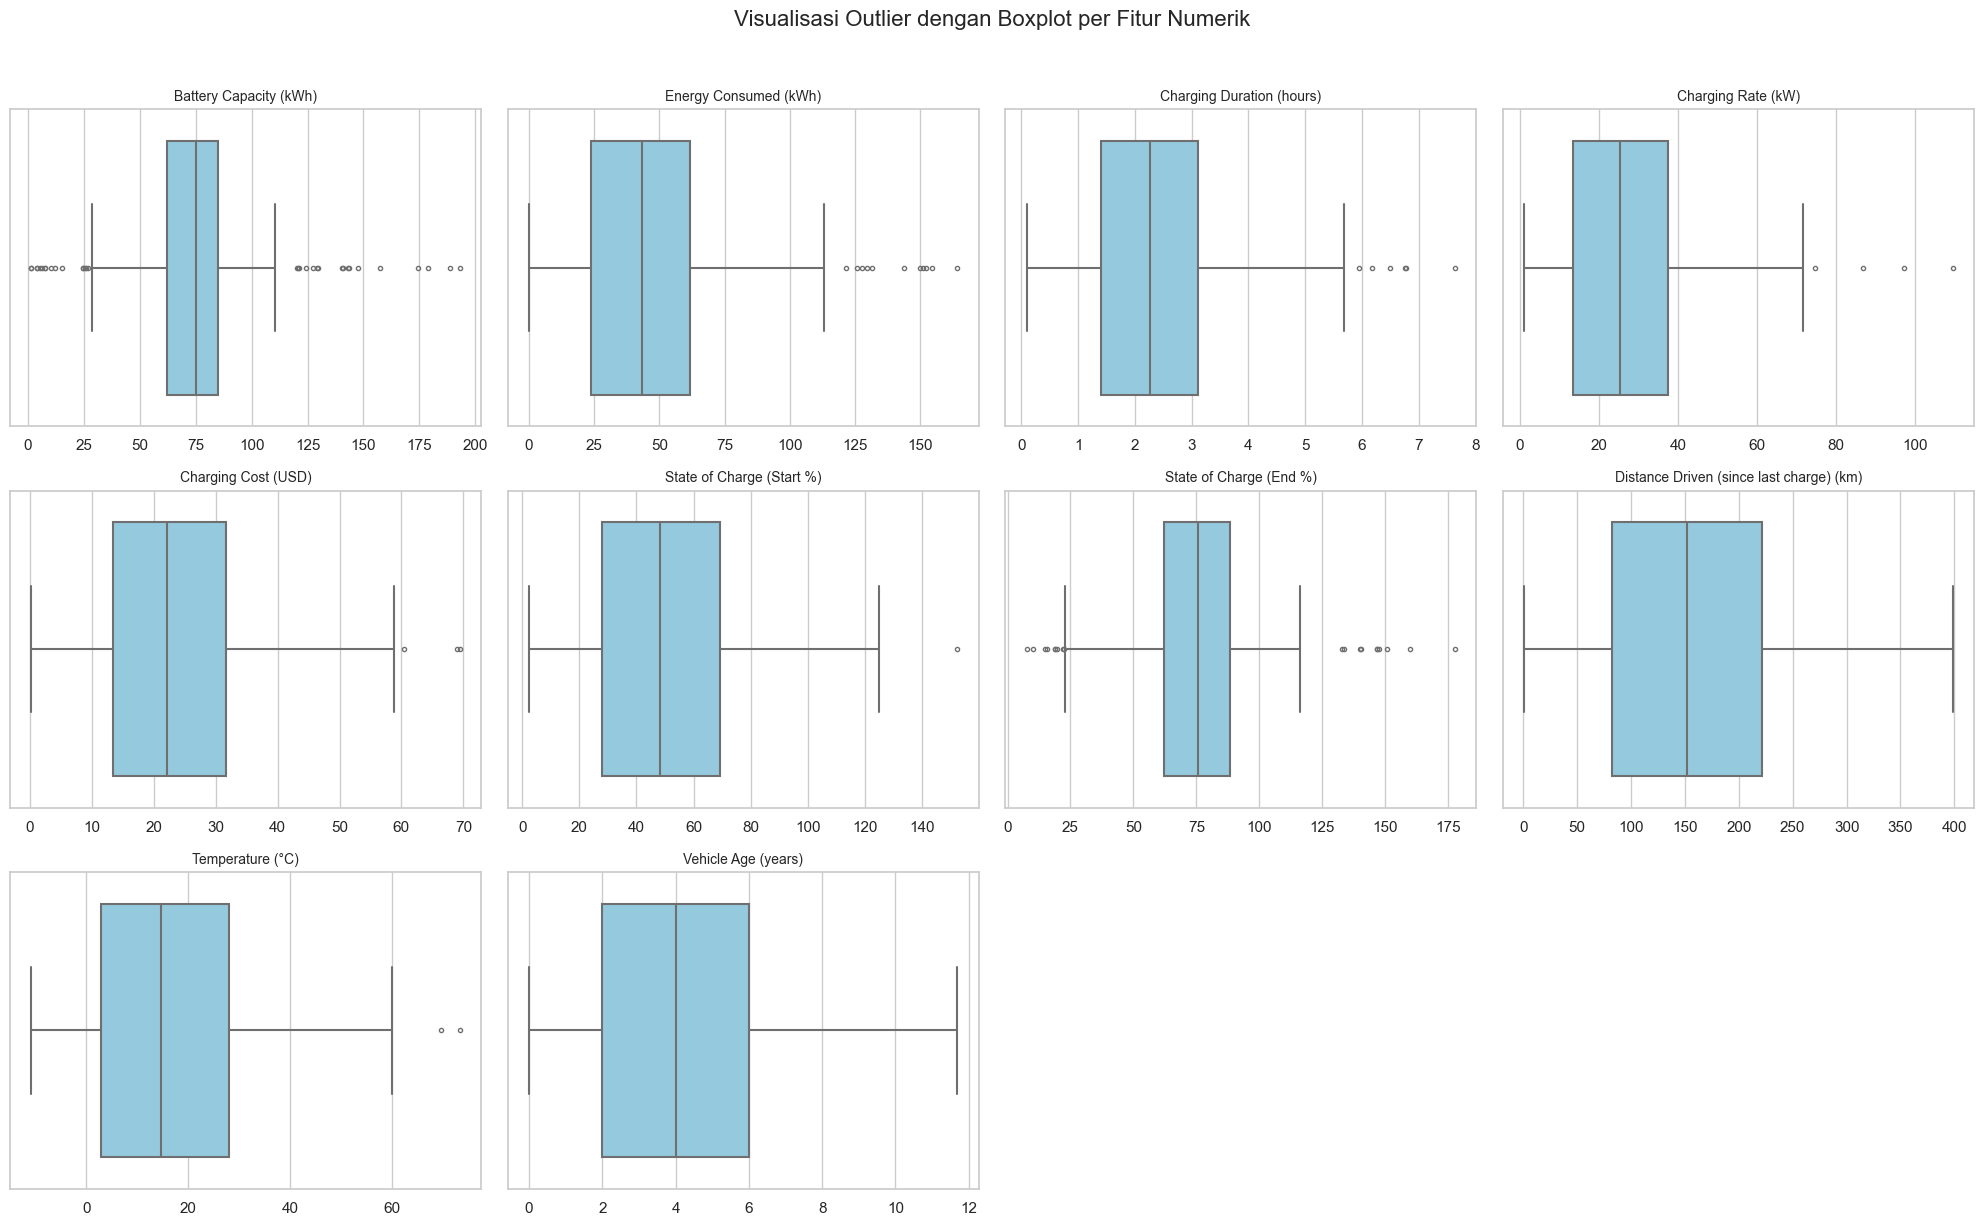

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

n_cols = 4
n_rows = math.ceil(len(numerical_cols) / n_cols)

plt.figure(figsize=(5 * n_cols, 4 * n_rows))
sns.set(style="whitegrid")

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df[col], color='skyblue', linewidth=1.5, fliersize=3)
    plt.title(col, fontsize=10)
    plt.xlabel("") 

plt.suptitle('Visualisasi Outlier dengan Boxplot per Fitur Numerik', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


Menangani outlier kolom 'Battery Capacity (kWh)', 'State of Charge (End %)', 'Energy Consumed (kWh)' menggunakan median

In [17]:
target_columns = ['Battery Capacity (kWh)', 'State of Charge (End %)', 'Energy Consumed (kWh)']

def replace_outliers_iqr_with_median(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_value = df[col].median()

    df[col] = df[col].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

for col in target_columns:
    replace_outliers_iqr_with_median(df, col)

Cek outlier setelah ditangani

In [18]:
import pandas as pd

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

def count_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((data[col] < lower_bound) | (data[col] > upper_bound)).sum()

outlier_counts = {col: count_outliers_iqr(df, col) for col in numerical_cols}

print(pd.Series(outlier_counts).sort_values(ascending=False))

Charging Duration (hours)                   6
Charging Rate (kW)                          4
Charging Cost (USD)                         3
State of Charge (End %)                     3
Temperature (°C)                            2
State of Charge (Start %)                   1
Energy Consumed (kWh)                       0
Battery Capacity (kWh)                      0
Distance Driven (since last charge) (km)    0
Vehicle Age (years)                         0
dtype: int64


Menghapus outlier

In [19]:
def remove_iqr_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Kolom-kolom yang memiliki outlier dan akan dibersihkan
outlier_cols = [
    'Charging Duration (hours)', 'Charging Rate (kW)', 'Charging Cost (USD)',
    'State of Charge (End %)', 'Temperature (°C)', 'State of Charge (Start %)'
]

# Hapus outlier dari semua kolom tersebut
for col in outlier_cols:
    df = remove_iqr_outliers(df, col)


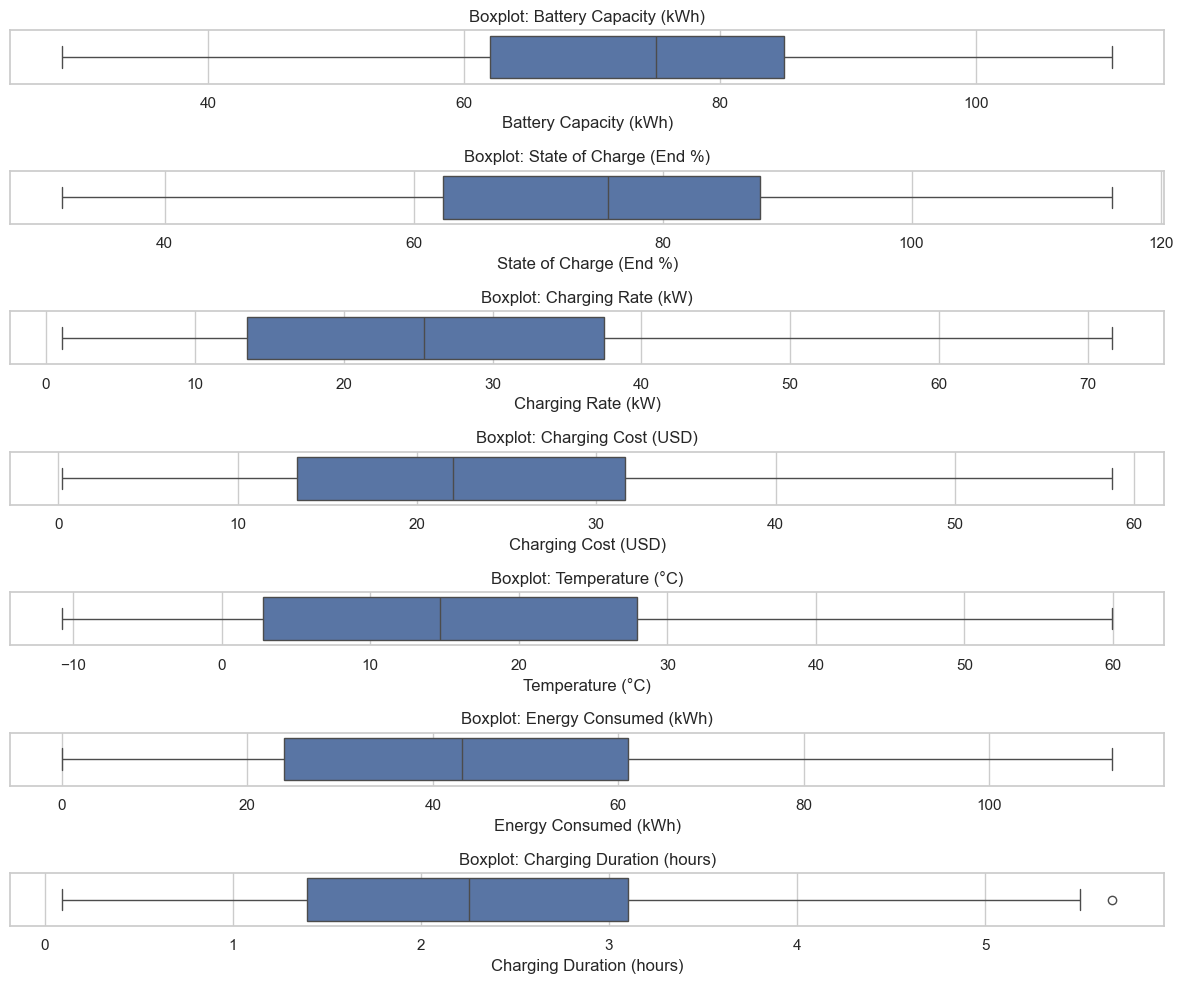

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

cols_to_plot = [
    'Battery Capacity (kWh)',
    'State of Charge (End %)',
    'Charging Rate (kW)',              
    'Charging Cost (USD)',             
    'Temperature (°C)',
    'Energy Consumed (kWh)',
    'Charging Duration (hours)'
]

plt.figure(figsize=(12, 10))
for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(len(cols_to_plot), 1, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot: {col}')
plt.tight_layout()
plt.show()


Visualisasi Distribusi

<Figure size 1500x800 with 0 Axes>

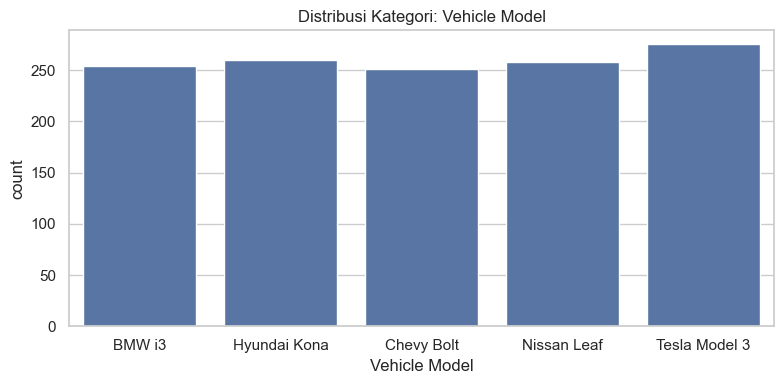

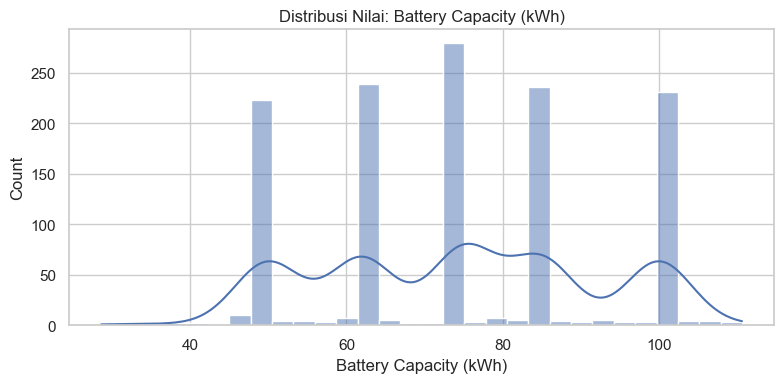

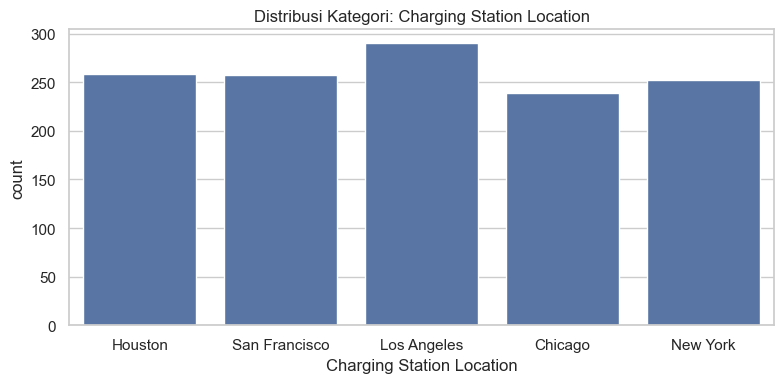

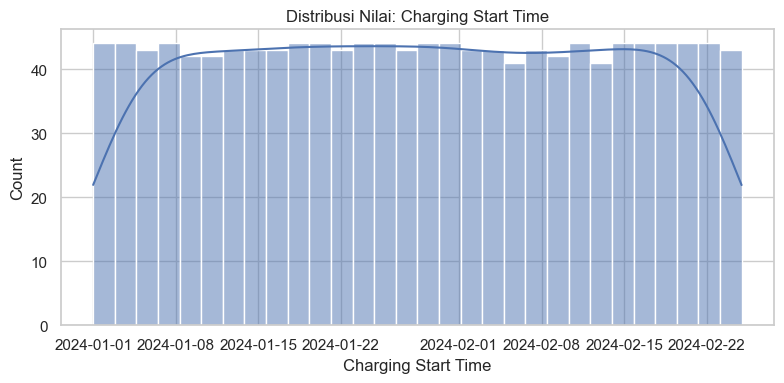

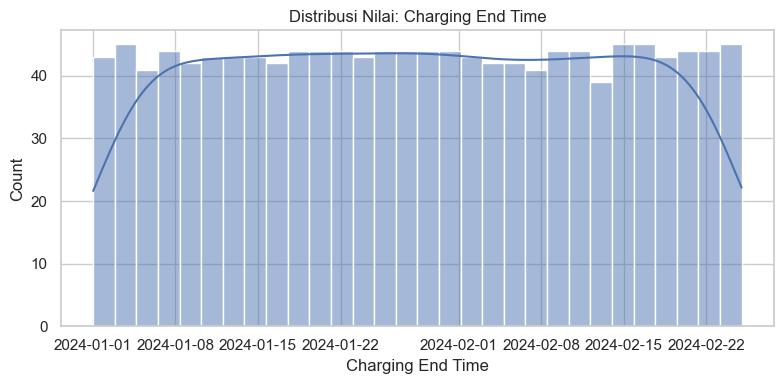

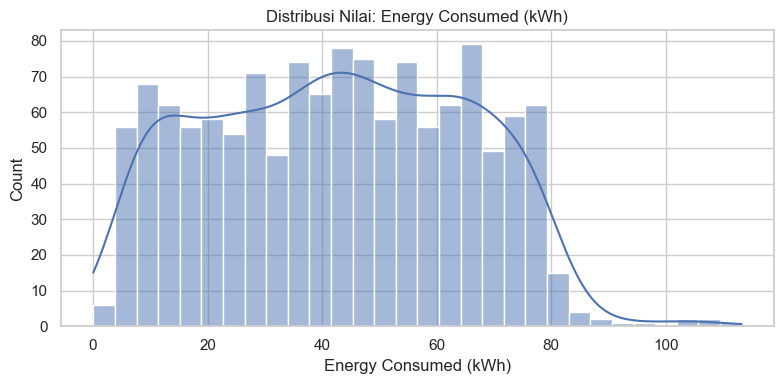

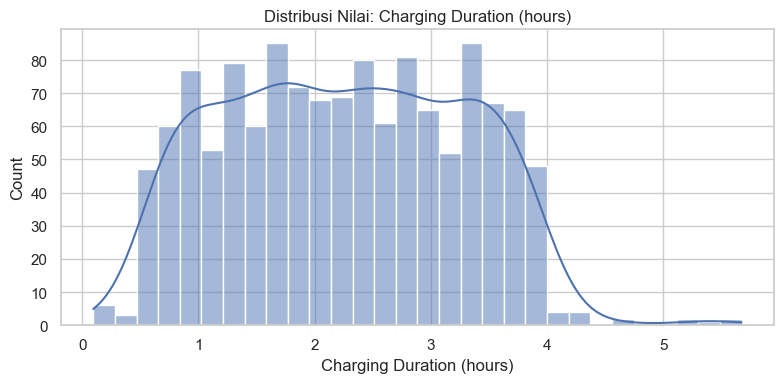

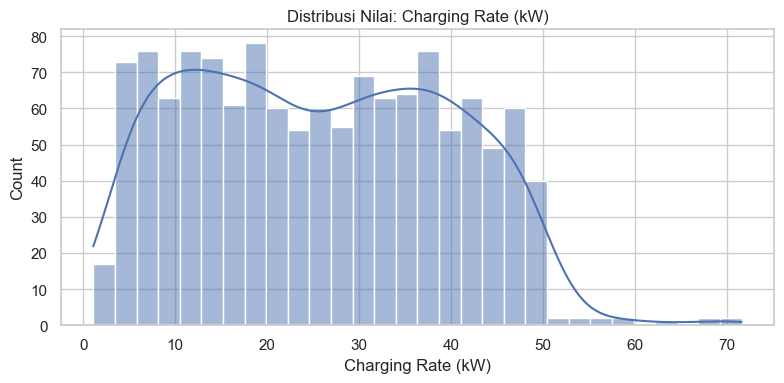

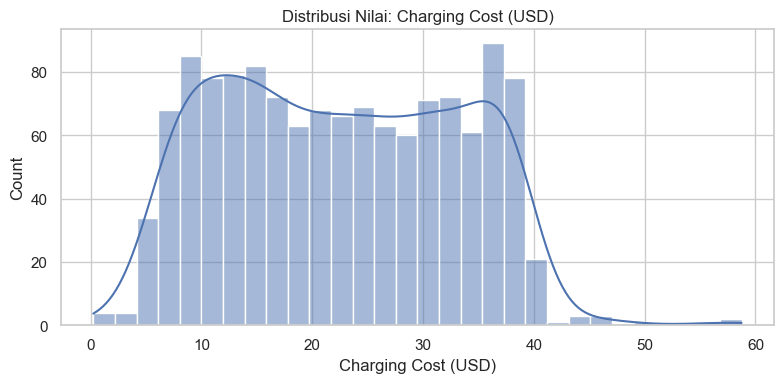

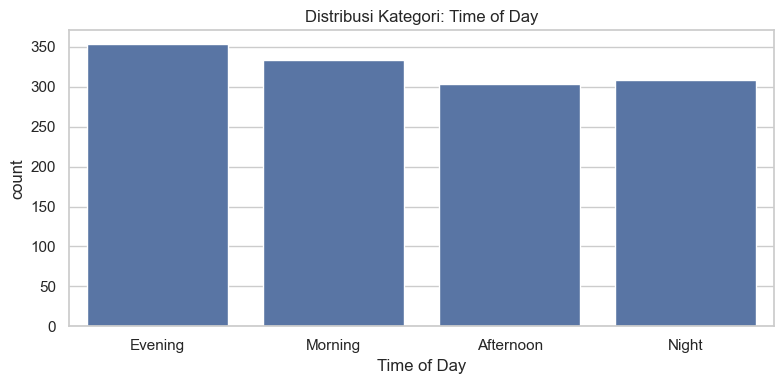

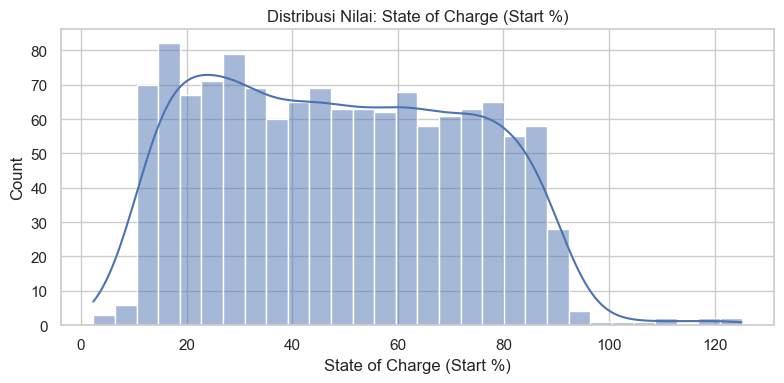

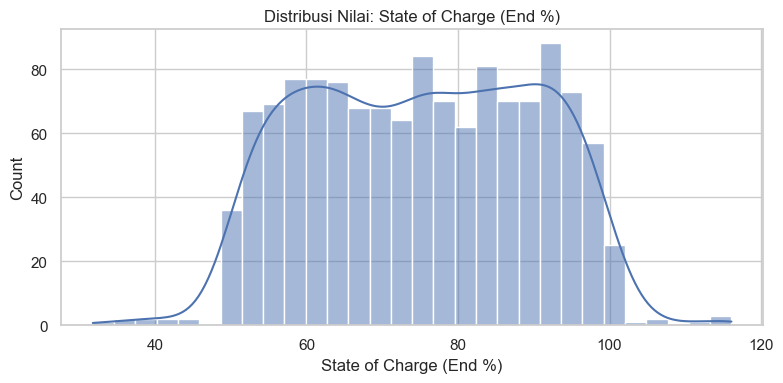

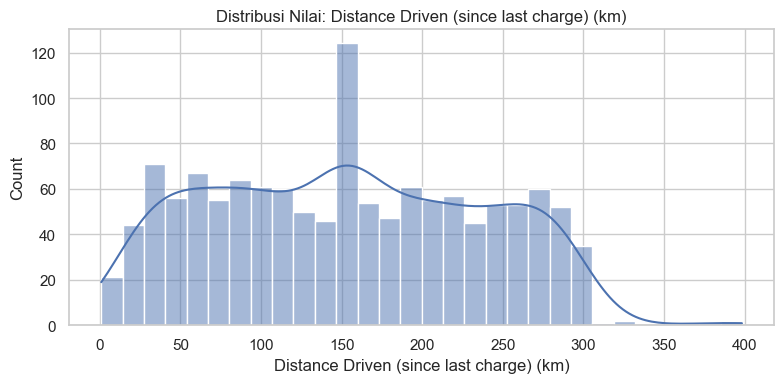

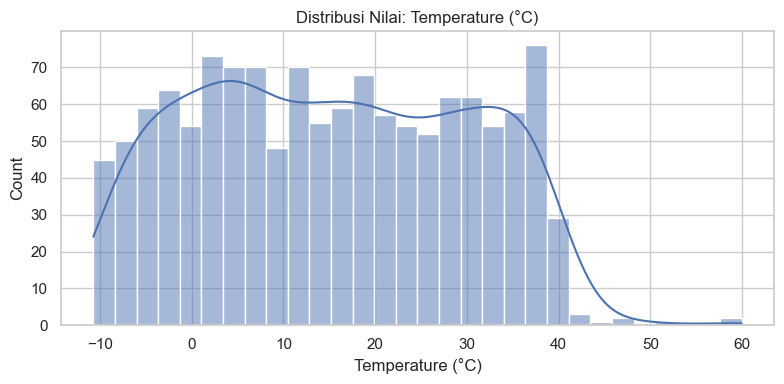

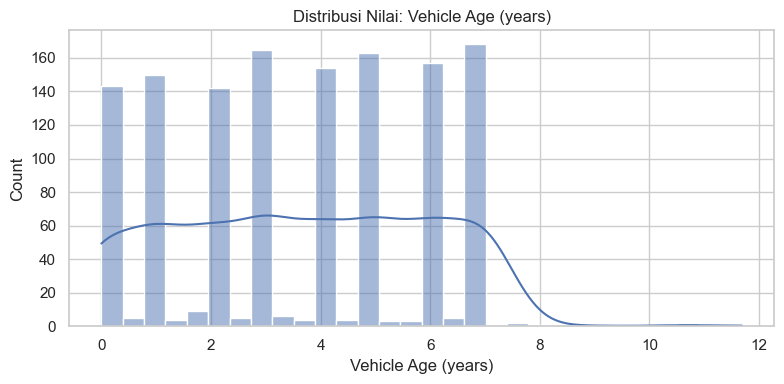

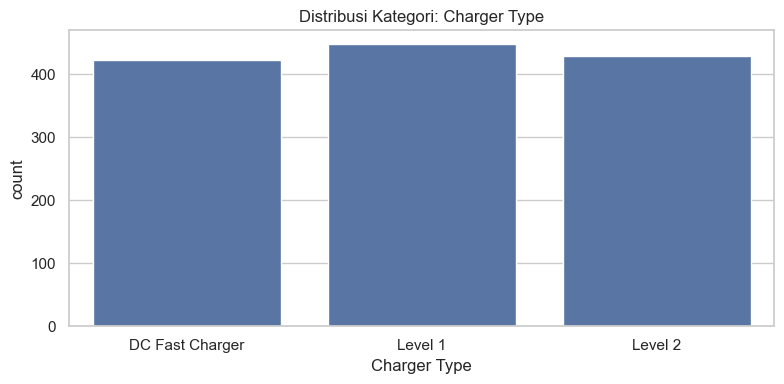

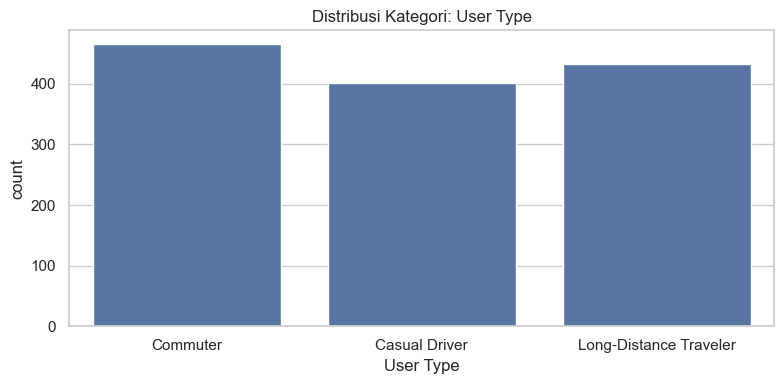

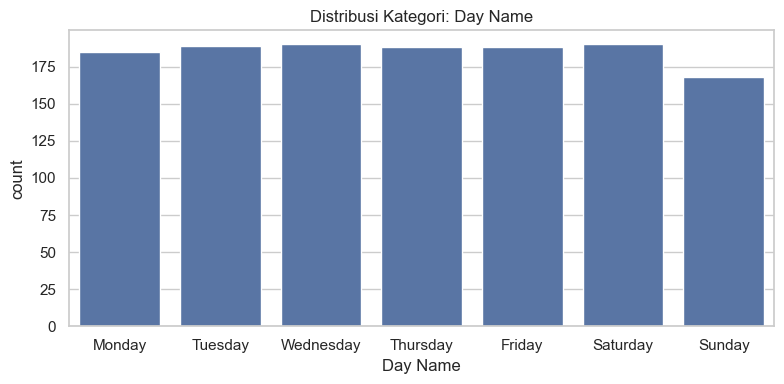

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))

for column in df.columns:
    plt.figure(figsize=(8, 4))
    if df[column].dtype == 'object':
        # Untuk kolom kategorik
        sns.countplot(data=df, x=column)
        plt.title(f'Distribusi Kategori: {column}')
    else:
        # Untuk kolom numerik
        sns.histplot(df[column].dropna(), kde=True, bins=30)
        plt.title(f'Distribusi Nilai: {column}')
    plt.tight_layout()
    plt.show()

Feature Engineering

In [22]:
def assign_time_slot(dt):
    hour = dt.hour
    if 3 <= hour < 10:
        return 'Pagi'
    elif 10 <= hour < 15:
        return 'Siang'
    elif 15 <= hour < 18:
        return 'Sore'
    elif 18 <= hour < 19:
        return 'Petang'
    elif 19 <= hour < 24:
        return 'Malam'
    else: 
        return 'Malam'

df['Time Slot'] = df['Charging Start Time'].apply(assign_time_slot)


In [23]:
df['Is Weekend'] = df['Day Name'].isin(['Saturday', 'Sunday']).astype(int)

In [24]:
df['Charging Efficiency (kWh/hour)'] = df['Energy Consumed (kWh)'] / df['Charging Duration (hours)']

In [25]:
df['Cost per kWh'] = df['Charging Cost (USD)'] / df['Energy Consumed (kWh)']

Cek outlier menggunakan IQR

In [26]:
import pandas as pd

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

def count_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((data[col] < lower_bound) | (data[col] > upper_bound)).sum()

outlier_counts = {col: count_outliers_iqr(df, col) for col in numerical_cols}

print(pd.Series(outlier_counts).sort_values(ascending=False))

Cost per kWh                                134
Charging Efficiency (kWh/hour)               98
Charging Duration (hours)                     1
Battery Capacity (kWh)                        0
Energy Consumed (kWh)                         0
Charging Cost (USD)                           0
Charging Rate (kW)                            0
State of Charge (Start %)                     0
State of Charge (End %)                       0
Temperature (°C)                              0
Distance Driven (since last charge) (km)      0
Is Weekend                                    0
Vehicle Age (years)                           0
dtype: int64


Mengisi outlier menggunakan median

In [27]:
def replace_outliers_with_median(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    median_val = df[col].median()
    df[col] = df[col].apply(lambda x: median_val if x < lower or x > upper else x)

# Terapkan untuk dua kolom
replace_outliers_with_median(df, 'Cost per kWh')
replace_outliers_with_median(df, 'Charging Efficiency (kWh/hour)')

Menghapus outlier

In [28]:
def drop_outliers_iteratively(df, col):
    while True:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        mask = (df[col] < lower) | (df[col] > upper)
        if mask.sum() == 0:
            break
        df = df[~mask]
    return df

# Terapkan untuk dua kolom
df = drop_outliers_iteratively(df, 'Cost per kWh')
df = drop_outliers_iteratively(df, 'Charging Efficiency (kWh/hour)')


In [29]:
df.head()

,Vehicle Model,Battery Capacity (kWh),Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,...,Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type,Day Name,Time Slot,Is Weekend,Charging Efficiency (kWh/hour),Cost per kWh
0,BMW i3,108.463007,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,...,293.602111,27.947953,2.0,DC Fast Charger,Commuter,Monday,Malam,0,18.985053,0.215569
3,Hyundai Kona,50.000000,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,...,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler,Monday,Pagi,0,18.985053,0.164065
4,Hyundai Kona,50.000000,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,...,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler,Monday,Pagi,0,9.718509,0.517674
5,Nissan Leaf,50.000000,San Francisco,2024-01-01 05:00:00,2024-01-01 07:10:00,43.181137,1.167640,14.334523,36.900341,Evening,...,143.680046,-5.274218,0.0,DC Fast Charger,Long-Distance Traveler,Monday,Pagi,0,36.981545,0.854548
6,Chevy Bolt,85.000000,Houston,2024-01-01 06:00:00,2024-01-01 07:53:00,36.862140,3.539619,26.185188,22.214225,Evening,...,81.338009,27.551335,4.0,Level 2,Commuter,Monday,Pagi,0,10.414155,0.602630


Mengelompokkan kolom yang numerik

In [30]:
numerical_cols = [
    'Battery Capacity (kWh)', 'Charging Duration (hours)', 'Charging Rate (kW)', 'Charging Cost (USD)', 'State of Charge (Start %)',
    'State of Charge (End %)', 'Distance Driven (since last charge) (km)', 'Temperature (°C)', 'Charging Efficiency (kWh/hour)',
    'Is Weekend', 'Cost per kWh'
]

Mengelompokkan kolom yang kategorik

In [31]:
categorical_cols = [
    'Vehicle Model', 'Charging Station Location', 'Time of Day',
    'Charger Type', 'User Type', 'Day Name', 'Time Slot'
]

Normalisasi pada kolom numerik dan One Hot Encoding pada kolom kategorik

In [32]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

Transformasi data

In [33]:
from sklearn.pipeline import Pipeline

# Buat pipeline untuk transformasi fitur
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
X = pipeline.fit_transform(df)


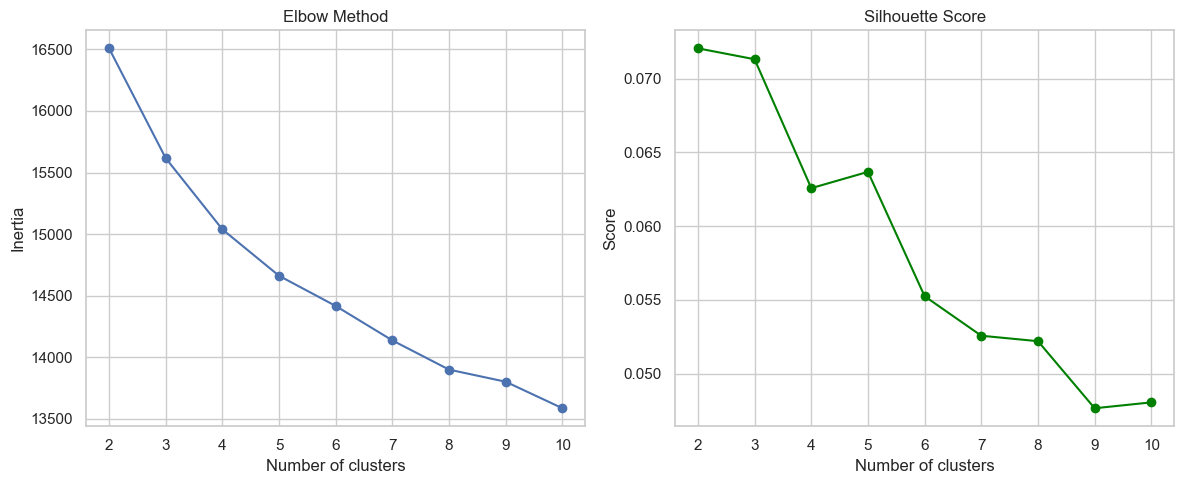

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertia = []
silhouette = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X, kmeans.labels_))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

plt.subplot(1,2,2)
plt.plot(K, silhouette, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.tight_layout()
plt.show()


Clustering Final dengan KMeans

In [351]:
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X)
df['Cluster'] = cluster_labels

Analisis Tiap Cluster

In [352]:
cluster_summary = df.groupby('Cluster')[
    ['Charging Duration (hours)', 'Energy Consumed (kWh)', 'Charging Efficiency (kWh/hour)', 
     'Cost per kWh', 'Distance Driven (since last charge) (km)', 'Is Weekend']
].mean().round(2)

print(cluster_summary)


         Charging Duration (hours)  Energy Consumed (kWh)  \
Cluster                                                     
0                             2.31                  37.74   
1                             2.41                  46.22   
2                             2.25                  52.54   

         Charging Efficiency (kWh/hour)  Cost per kWh  \
Cluster                                                 
0                                 16.62          0.64   
1                                 19.04          0.45   
2                                 22.94          0.28   

         Distance Driven (since last charge) (km)  Is Weekend  
Cluster                                                        
0                                          149.61         0.0  
1                                          151.75         1.0  
2                                          158.02         0.0  


In [353]:
pd.crosstab(df['Cluster'], df['Time Slot'], normalize='index') * 100

Time Slot,Malam,Pagi,Petang,Siang,Sore
Cluster,,,,,
0,32.594235,30.376940,3.547672,20.177384,13.303769
1,33.666667,28.333333,4.333333,21.666667,12.000000
2,31.988473,30.259366,5.187320,20.461095,12.103746


Distribusi Waktu Pengisian per Cluster

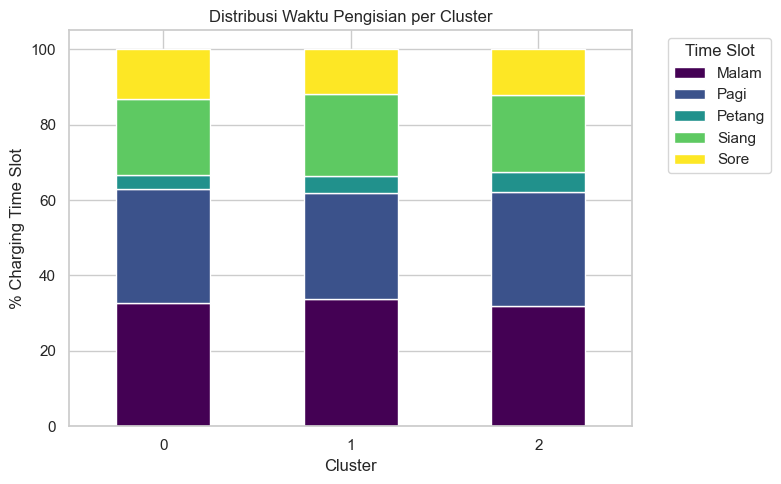

In [354]:
time_slot_dist = pd.crosstab(df['Cluster'], df['Time Slot'], normalize='index') * 100
time_slot_dist.plot(kind='bar', stacked=True, colormap='viridis', figsize=(8, 5))
plt.ylabel('% Charging Time Slot')
plt.title('Distribusi Waktu Pengisian per Cluster')
plt.xticks(rotation=0) 
plt.legend(title='Time Slot', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Rata-rata Fitur Penting per Cluster

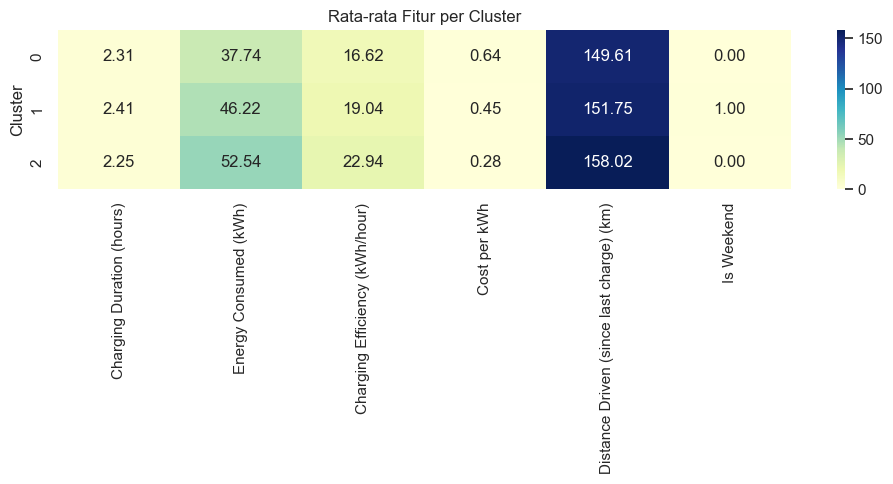

In [355]:
import seaborn as sns

selected_features = [
    'Charging Duration (hours)', 'Energy Consumed (kWh)', 'Charging Efficiency (kWh/hour)',
    'Cost per kWh', 'Distance Driven (since last charge) (km)', 'Is Weekend'
]

cluster_summary = df.groupby('Cluster')[selected_features].mean()
plt.figure(figsize=(10, 5))
sns.heatmap(cluster_summary, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Rata-rata Fitur per Cluster")
plt.ylabel("Cluster")
plt.tight_layout()


Sebaran Cluster (2D)

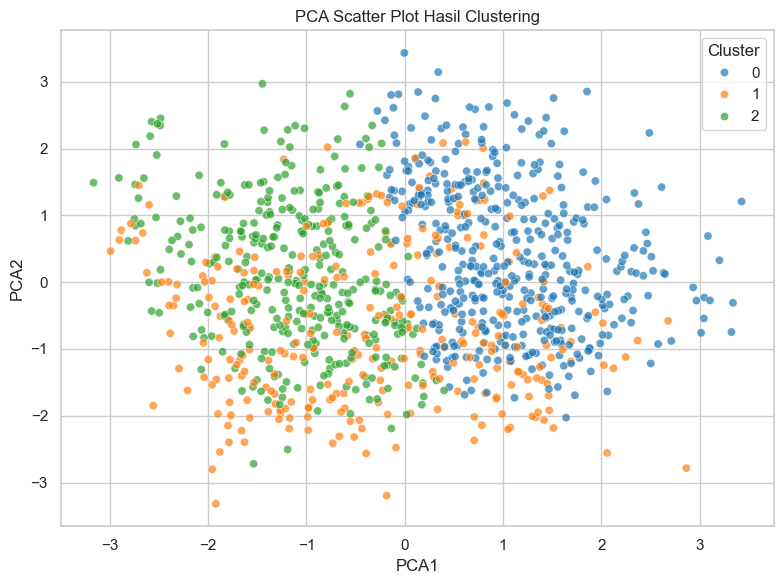

In [356]:
from sklearn.decomposition import PCA

X_pca = PCA(n_components=2).fit_transform(X)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', alpha=0.7)
plt.title('PCA Scatter Plot Hasil Clustering')
plt.tight_layout()

Jumlah biaya yang dikeluarkan selama dua bulan pada masing masing stasiun

In [ ]:
import pandas as pd

df['Charging Start Time'] = pd.to_datetime(df['Charging Start Time'])

end_date = df['Charging Start Time'].max()
start_date = end_date - pd.DateOffset(months=2)

df_2bulan = df[(df['Charging Start Time'] >= start_date) & (df['Charging Start Time'] <= end_date)]

lokasi_tertentu = ['Los Angeles', 'Houston', 'Chicago', 'San Francisco', 'New York']
df_lokasi = df_2bulan[df_2bulan['Charging Station Location'].isin(lokasi_tertentu)]
df_lokasi['Total Cost'] = df_lokasi['Energy Consumed (kWh)'] * df_lokasi['Cost per kWh']
total_biaya_per_lokasi = df_lokasi.groupby('Charging Station Location')['Total Cost'].sum().sort_values(ascending=False)

print("Jumlah biaya selama dua bulan terakhir:")
print(total_biaya_per_lokasi)


Jumlah biaya selama dua bulan terakhir:
Charging Station Location
Los Angeles      4482.017002
Houston          4164.493525
San Francisco    4039.112012
Chicago          4013.949163
New York         3878.015805
Name: Total Cost, dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14876\1308220457.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


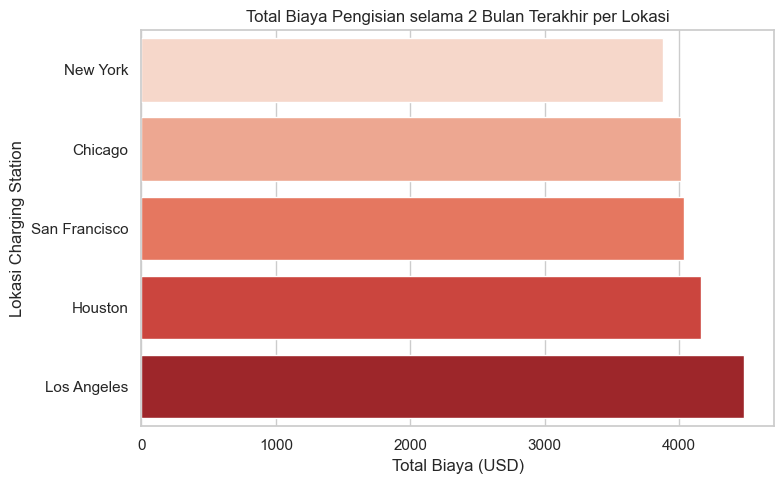

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['Charging Start Time'] = pd.to_datetime(df['Charging Start Time'])

end_date = df['Charging Start Time'].max()
start_date = end_date - pd.DateOffset(months=2)

df_2bulan = df[(df['Charging Start Time'] >= start_date) & (df['Charging Start Time'] <= end_date)]
lokasi_tertentu = ['Los Angeles', 'Houston', 'Chicago', 'San Francisco', 'New York']

df_lokasi = df_2bulan[df_2bulan['Charging Station Location'].isin(lokasi_tertentu)]
df_lokasi['Total Cost'] = df_lokasi['Energy Consumed (kWh)'] * df_lokasi['Cost per kWh']
total_biaya_per_lokasi = df_lokasi.groupby('Charging Station Location')['Total Cost'].sum().sort_values()
colors = sns.color_palette("Reds", len(total_biaya_per_lokasi))[::1]

plt.figure(figsize=(8, 5))
sns.barplot(
    x=total_biaya_per_lokasi.values,
    y=total_biaya_per_lokasi.index,
    palette=colors
)
plt.title('Total Biaya Pengisian selama 2 Bulan Terakhir per Lokasi')
plt.xlabel('Total Biaya (USD)')
plt.ylabel('Lokasi Charging Station')
plt.tight_layout()
plt.show()